<a href="https://colab.research.google.com/github/AshKnight99/Image-fusion/blob/main/image_preprocessing_fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merging RGB and Thermal Images
* GRP3 - B.TECH Project

The Kaist dataset used here contains parallel RGB and Thermal images. Both these types of images have 3 channels but are in .jpg format. 
Dataset - KAIST Multispectral Pedestrian Detection Benchmark (https://soonminhwang.github.io/rgbt-ped-detection/data/)

The five image fusion shown here are:
* merge images using a scaled IR image averaged with each RGB layer
* merge images using a scaled RGB image averaged with each IR layer
* threshold by certain level of thermal luminance
    * two threshold values are chosen
* convert RGB to HSV, replace I with IR, revert to RGB
* convert RGB to LAB, replace L with IR, revert to RGB

In [7]:
%cd /content/drive/MyDrive/Imagefusion_basic
!ls

/content/drive/.shortcut-targets-by-id/1dCPzvOHtEE4eMDLtnonMkPeZaIcW7Plt/Imagefusion_basic
image_preprocessing_fusion.ipynb  images  merging_utilities


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from os import listdir, getcwd
from skimage.io import imread, imsave
from skimage.color import rgb2gray, hsv2rgb, rgb2hsv, lab2rgb, rgb2lab

# Convert an image to unsigned byte format, with values in [0, 255]
from skimage import img_as_ubyte

import warnings
warnings.filterwarnings('ignore')

# import utility functions
from merging_utilities.img_utils import *
from merging_utilities.os_utils import *
from merging_utilities.plotting import *
from merging_utilities.merging import *


* img utility functions: `merging_utilities/img_utils.py`
* plotting functions: `merging_utilities/plotting.py`
* merging functions: `merging_utilities/merging.py`
* os utility functions: `merging_utilities/os_utils.py`

## Read in Data

In [9]:
curr_dir = getcwd()
data_dir = curr_dir + '/images/'

# Check out
#data_dir = get_img_dir(data_dir)

dirs = get_img_sets()
print('data directory: ',data_dir)
print('subdirectories: ',list(dirs.keys()))

data directory:  /content/drive/.shortcut-targets-by-id/1dCPzvOHtEE4eMDLtnonMkPeZaIcW7Plt/Imagefusion_basic/images/
subdirectories:  ['thermal', 'color']


In [10]:
image_set_filenames = dirs

color_img_filenames = image_set_filenames['color']
thermal_img_filenames = image_set_filenames['thermal']


# check_parallel_filenames(averaged_img_filenames,thermal_img_filenames)
parallel, not_parallel = verify_parallel_filenames(image_set_filenames)

## Number of images

In [11]:
print(len(color_img_filenames))


22


### Let's read in and take a look at parallel color and thermal images from our data

shape  (512, 640, 3)


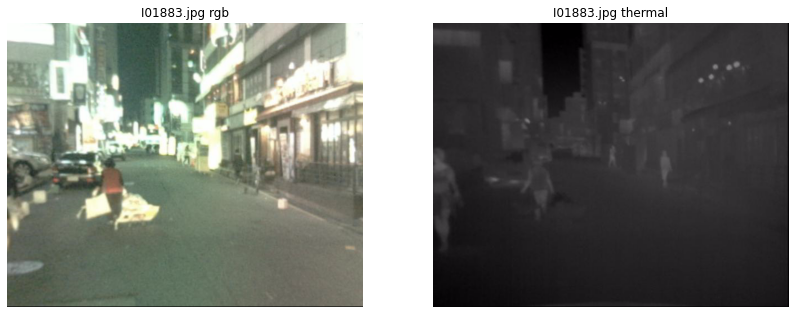

In [12]:
# get sample image
img_num = 0

# for img_num in range(len(color_img_filenames)):
img1_rgb = imread(data_dir + 'color/' + \
                      color_img_filenames[img_num])
img1_ir = imread(data_dir + 'thermal/' + \
                     color_img_filenames[img_num])
print("shape ", img1_ir.shape)
plot_images(img1_rgb, color_img_filenames[img_num] + ' rgb',
                img1_ir, color_img_filenames[img_num] + ' thermal')


### Let's look at the RGB image and its grayscale and channel histograms

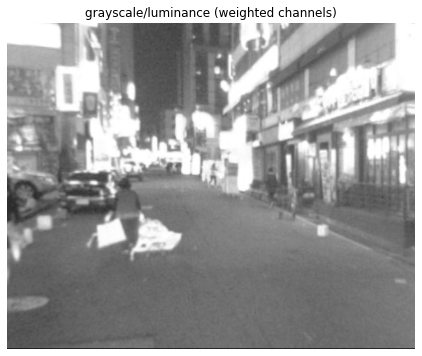

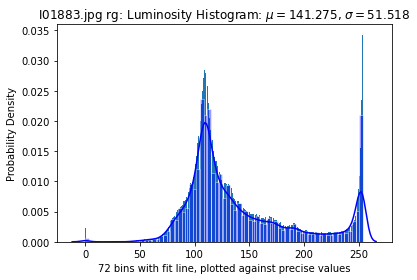

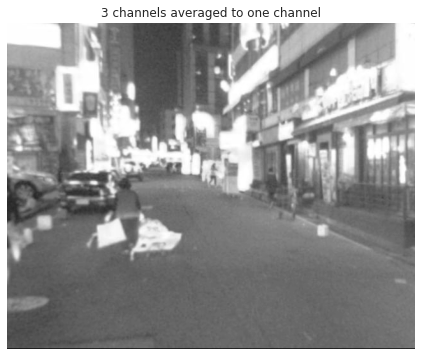

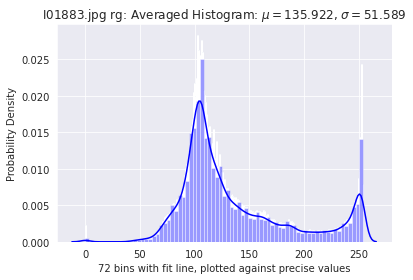

In [13]:
# print(img1_rgb[:1]) 
# for img_num in range(len(color_img_filenames)):
plot_histograms(img1_rgb, 
            color_img_filenames[img_num] + ' rgb', 
            images=True) 

### Thermal image and its "grayscale" and channel histograms
* Note that we have three channels on the thermal input. They are slightly variant, but not extremely so. They will be averaged into a single thermal channel


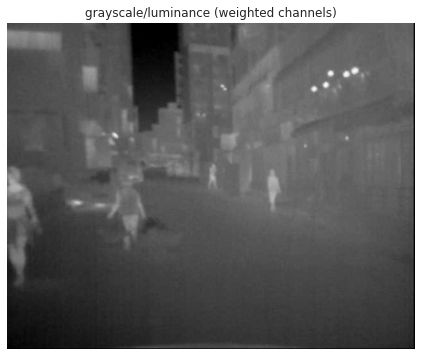

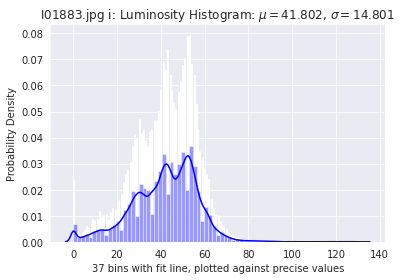

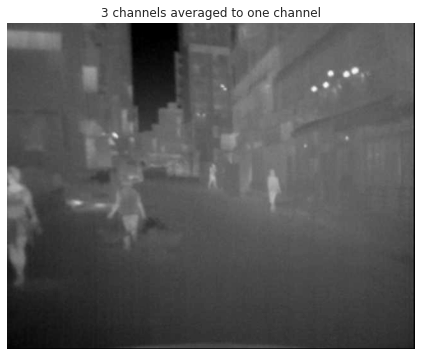

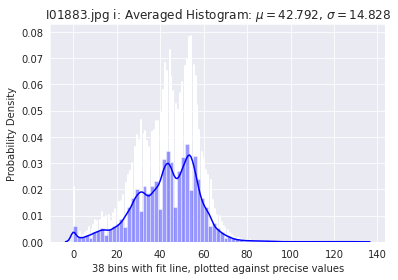

In [14]:
plot_histograms(img1_ir, 
                color_img_filenames[img_num] + ' ir',
                images=True)

# Merging Images

## Method 1: Average each layer with thermal/IR layer

### Type 1:  Merge images using a scaled IR image averaged with each RGB layer

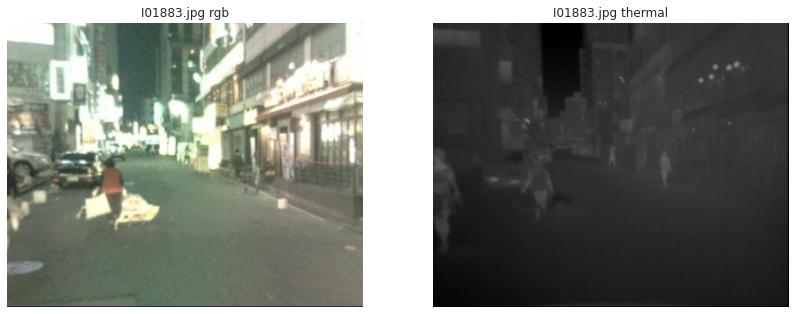

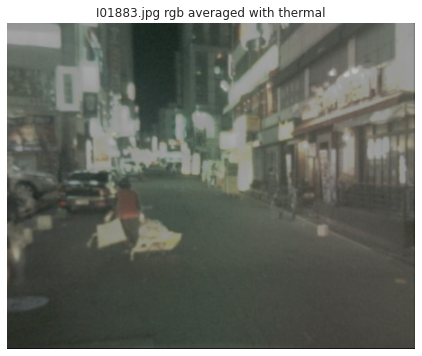

In [15]:
# data_dir = get_img_dir()

samp_num = 0
# for samp_num in range(len(color_img_filenames)):
img2_rgb = imread(data_dir + 'color/' + color_img_filenames[samp_num])
img2_ir = imread(data_dir + 'thermal/' + color_img_filenames[samp_num])
    
#average
avgd_img2 = therm_avg(img2_rgb, img2_ir)

plot_images(img2_rgb, 
                color_img_filenames[samp_num] + ' rgb',
                img2_ir,
                color_img_filenames[samp_num] + ' thermal')
plot_image(avgd_img2, 
            color_img_filenames[samp_num] + ' rgb averaged with thermal')


    # quick verify averaging of layer pix
    #Considering G channel     
#     print(' ',img2_rgb[0][0][1])
#     print('+',img2_ir[0][0][1])
#     print('----')
#     layr_sum = img2_rgb[0][0][1]+img2_ir[0][0][1]
#     print(layr_sum,'/ 2 =',layr_sum/2.,'~?',avgd_img2[0][0][1])


### Type 2:  Merge images using a scaled RGB image averaged with each IR layer

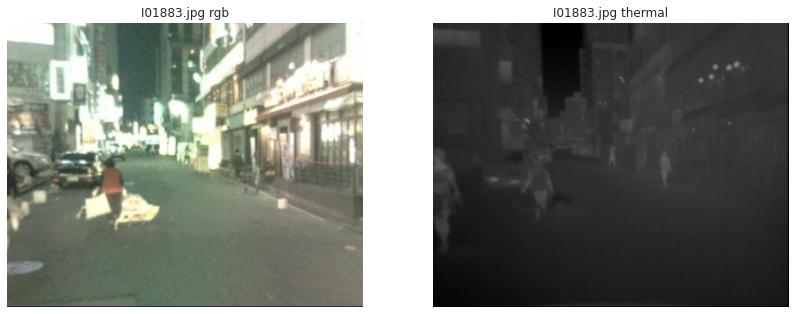

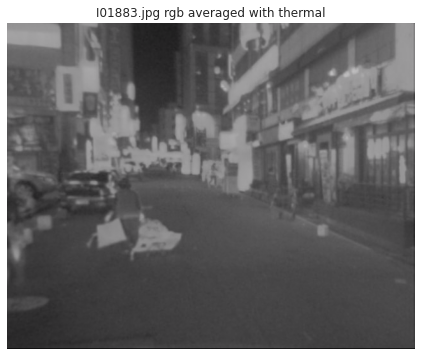

In [16]:
# for samp_num in range(len(color_img_filenames)):
samp_num = 0
img2_rgb = imread(data_dir + 'color/' + color_img_filenames[samp_num])
img2_ir = imread(data_dir + 'thermal/' + color_img_filenames[samp_num])
    
#average
avgd_img2 = therm_avg(img2_ir, img2_rgb)


plot_images(img2_rgb, 
                color_img_filenames[0] + ' rgb',
                img2_ir,
                color_img_filenames[0] + ' thermal')
plot_image(avgd_img2, 
            color_img_filenames[0] + ' rgb averaged with thermal')


# Method 2: Threshold by certain level of thermal luminance



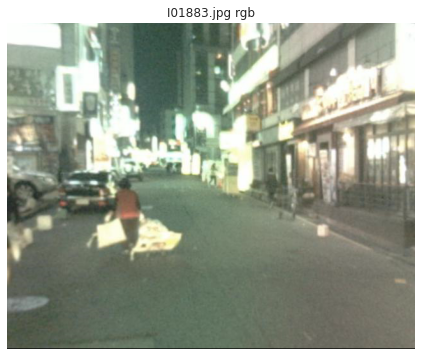

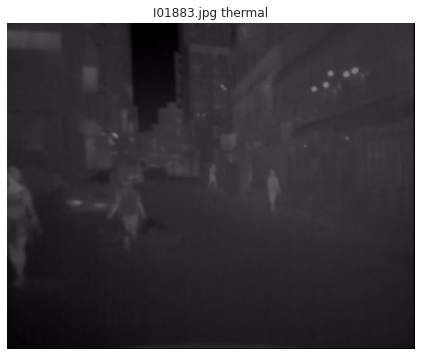

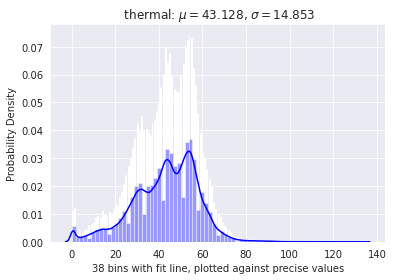

In [17]:
# let's revisit the a flattened thermal image
img3_rgb = imread(data_dir + 'color/' + color_img_filenames[samp_num])
img3_thermal = imread(data_dir + 'thermal/' + color_img_filenames[samp_num])

img4_rgb = imread(data_dir + 'color/' + color_img_filenames[samp_num])
img4_thermal = imread(data_dir + 'thermal/' + color_img_filenames[samp_num])

plot_image(img3_rgb, color_img_filenames[samp_num] + ' rgb')
plot_image(img3_thermal, color_img_filenames[samp_num] + ' thermal')
plot_histogram(img3_thermal, ' thermal')

* Based on the concept that whatever emits light also emits thermal energy

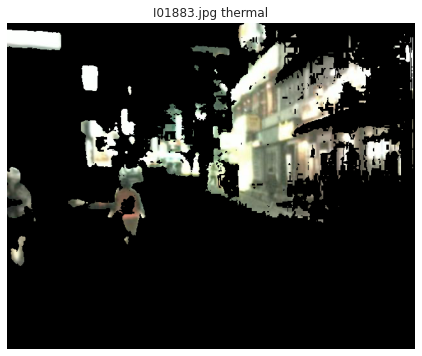

In [18]:
#Threshold values, to decide how much light parameter to consider
#follows matrix multiplication
img3_threshed = thresh_layers_by_thermal(img3_rgb, img3_thermal, 
                                         thresh = 55)
plot_image(img3_threshed, 
           color_img_filenames[samp_num] + ' thermal')

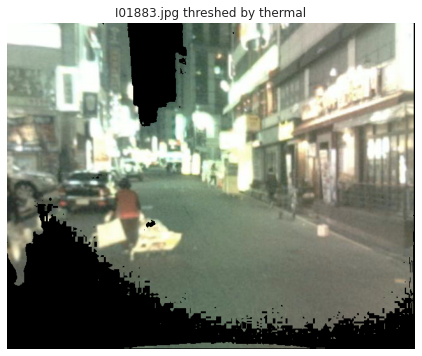

In [19]:
img4_threshed = thresh_layers_by_thermal(img4_rgb, img4_thermal, 
                                         thresh = 30)
plot_image(img4_threshed, 
           color_img_filenames[samp_num] + ' threshed by thermal')

<br>

## Convert RGB to HSV, replace V with IR, revert to RGB

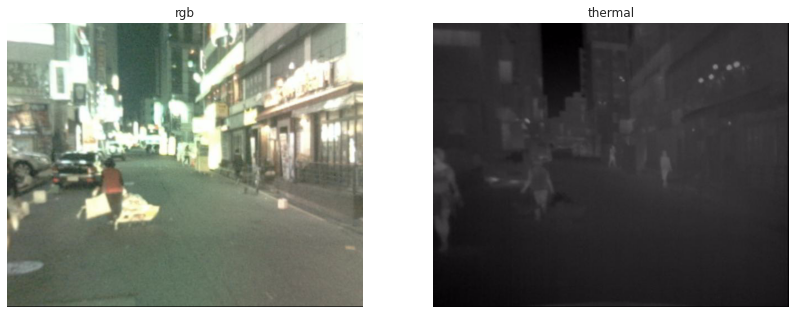

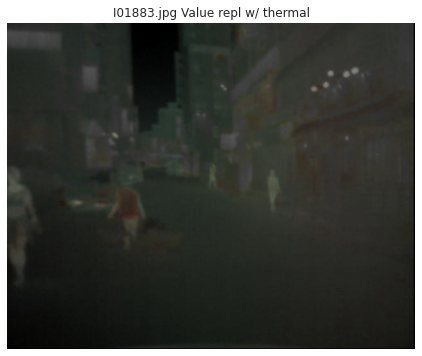

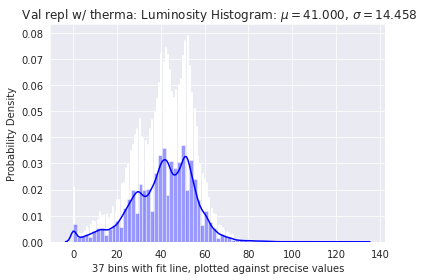

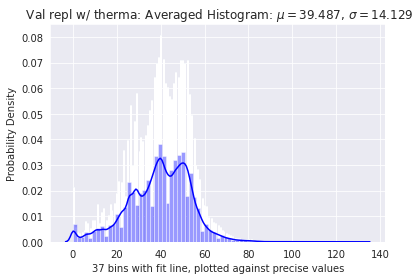

In [20]:
samp5_num = 0

img5_rgb = imread(data_dir + 'color/' \
                  + color_img_filenames[samp5_num])
img5_therm = imread(data_dir + 'thermal/' \
                 + color_img_filenames[samp5_num])

img5_val_w_therm = repl_val_with_therm(img5_rgb, img5_therm)

plot_images(img5_rgb, 'rgb',
            img5_therm, 'thermal')

plot_image(img5_val_w_therm, 
           color_img_filenames[samp5_num] + \
           ' Value repl w/ thermal')

plot_histograms(img5_val_w_therm, ' Val repl w/ thermal')

We can see that we've lost some human visual intuition here. However, people seem to still be discernible from the background as they go far. Replacing the Value (H and S mixing) channel with the thermal channel is intended to provide a latent "weight" to morphological features from heat-emitting objects (such as pedestrians).

## Convert RGB to LAB, replace L with IR, revert to RGB

As the V component in HSV describes the brighness of a color relative to the base color, the conversion back to RGB will alter darker colors, like blue, differently from how it will alter lighter colors, such as yellow.

LAB serves to address the perceptual uniformity property, to ensure the difference between two colors as perceived by the human eye. LAB color distances should be proportional to the **Euclidean distance within the color space**, thus preserved into the RGB space.

LAB conversion requires the application of a **standard illuminant** algorithm, which provides a theoretical source of the visible light in the image.

LAB stands for Luminance (or lightness) and A and B (which are chromatic components). According to this model A ranges from green to red, and B ranges from blue to yellow.

Illumiant used in this case is **D65**

<!-- more info:<br>
[wikipedia: lab color space](https://en.wikipedia.org/wiki/CIELAB_color_space)<br>
[wikipedia: standard illuminant](https://en.wikipedia.org/wiki/Standard_illuminant)<br>
[re: observer angle](https://www.xrite.com/service-support/what_is_meant_by_the_term_observer_angle) -->

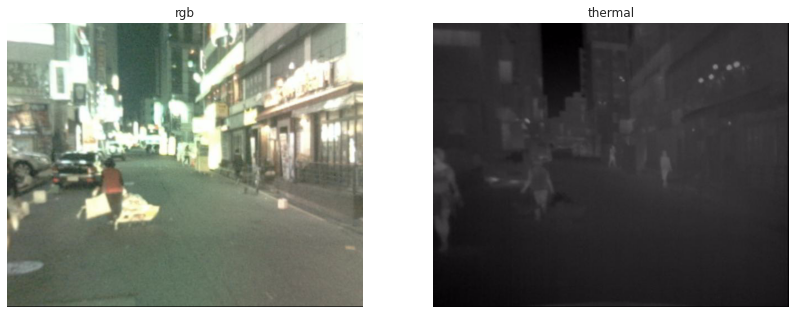

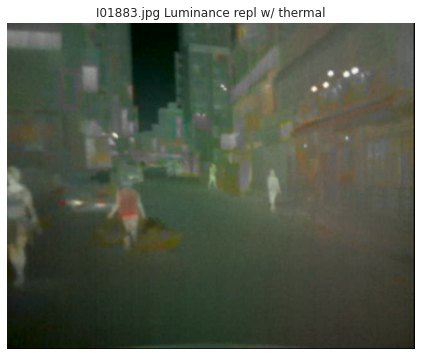

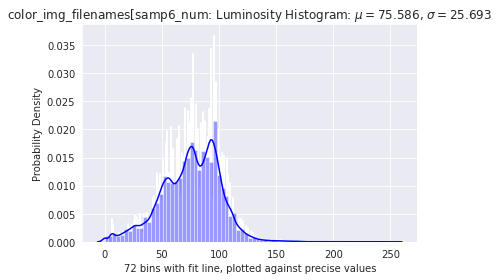

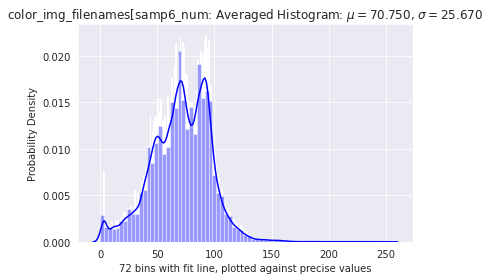

In [21]:
samp6_num = 0

img6_rgb = imread(data_dir + 'color/' \
                  + color_img_filenames[samp6_num])
img6_thermal = imread(data_dir + 'thermal/' \
                 + color_img_filenames[samp6_num])

img6_lum_w_therm = repl_light_with_therm(img6_rgb, img6_thermal)

plot_images(img6_rgb, 'rgb',
            img6_thermal, 'thermal')

plot_image(img6_lum_w_therm, 
           color_img_filenames[samp6_num] + \
           ' Luminance repl w/ thermal')

plot_histograms(img6_lum_w_therm, 
                'color_img_filenames[samp6_num]')


Note: The fusion image in this instance is rather effective at preserving color and morphological features. So it preserves both the thermal and the visible aspects 